In [148]:
print("Predicting remaining useful life")

Predicting remaining useful life


In [150]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

155145000.14585862

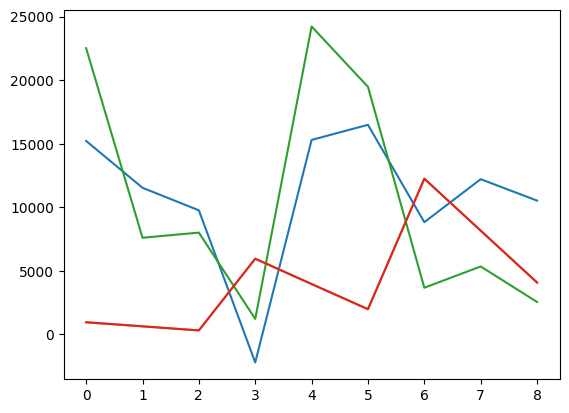

In [151]:
paths = ['../data/train/Bearing1_1_normalized_features.csv', '../data/train/Bearing2_1_normalized_features.csv', '../data/train/Bearing3_1_normalized_features.csv']

final_train_df = []
final_test_df = []
for path in paths:
    df_train = pd.read_csv(path)
    final_train_df.append(df_train)

final_train_df = pd.concat(final_train_df, ignore_index=True)


paths = ['../data/train/Bearing1_2_normalized_features.csv', '../data/train/Bearing2_2_normalized_features.csv', '../data/train/Bearing3_2_normalized_features.csv']
for path in paths:
    df_test = pd.read_csv(path)
    n = len(df_test)
    idx_25 = int(0.25*n)
    idx_50 = int(0.5*n)
    idx_75 = int(0.75*n)
    df_25 = df_test.iloc[:idx_25+1, :]
    df_50 = df_test.iloc[:idx_50+1, :]
    df_75 = df_test.iloc[:idx_75+1, :]
    final_test_df.append(df_25[["hi_smooth", "rul_value"]].iloc[-1:])
    final_test_df.append(df_50[["hi_smooth", "rul_value"]].iloc[-1:])
    final_test_df.append(df_75[["hi_smooth", "rul_value"]].iloc[-1:])
    

final_test_df = pd.concat(final_test_df, ignore_index=True)

x_train = final_train_df[["hi_smooth"]]
y_train = final_train_df["rul_value"].values

x_test = final_test_df[["hi_smooth"]]
y_test = final_test_df["rul_value"].values

# fitting a Linear Regression Model
lr_model = LinearRegression().fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

plt.plot(y_pred)
plt.plot(y_test)

mse = mean_squared_error(y_test, y_pred)
mse


# fitting a Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

plt.plot(y_pred)
plt.plot(y_test)

mse = mean_squared_error(y_test, y_pred)
mse

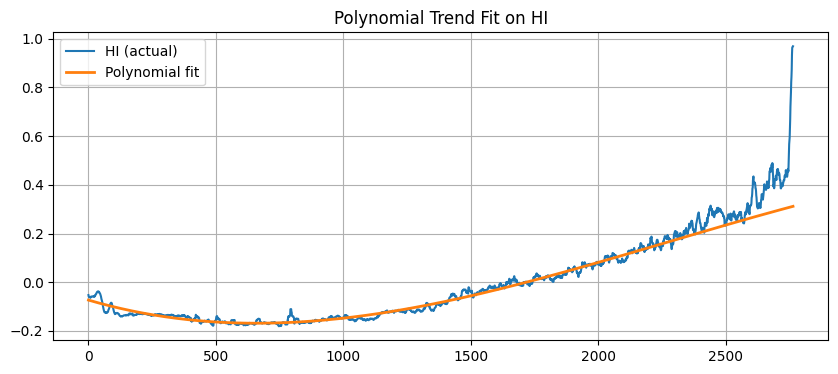

Predicted RUL (poly): [4647.2067786 4646.2067786 4645.2067786 ... 1886.2067786 1885.2067786
 1884.2067786]
################################################################################
Actual RUL (poly): 0       2765.00627
1       2764.00627
2       2763.00627
3       2762.00627
4       2761.00627
           ...    
2759       4.00627
2760       3.00627
2761       2.00627
2762       1.00627
2763       0.00627
Name: rul_value, Length: 2764, dtype: float64


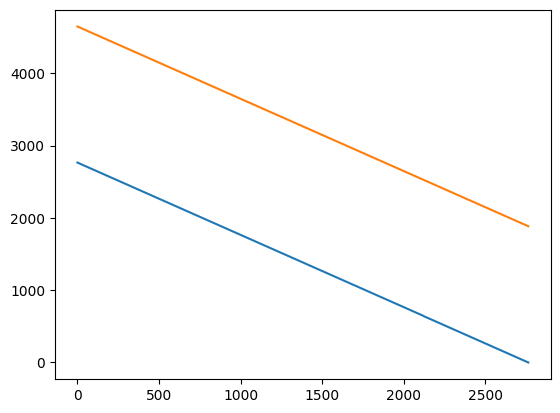

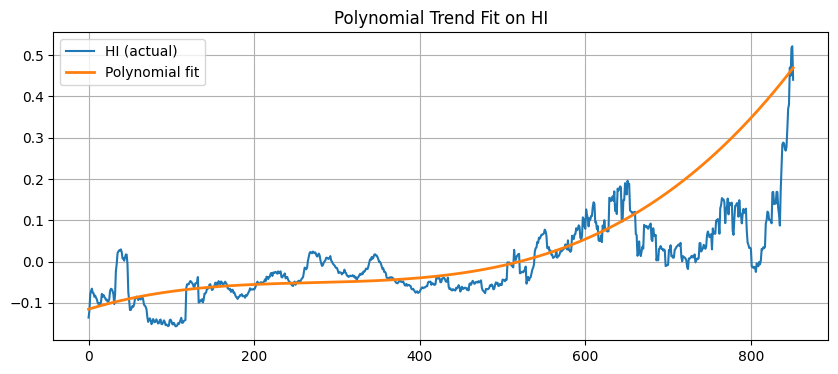

Predicted RUL (poly): [ 6.85240420e+02  6.84240420e+02  6.83240420e+02  6.82240420e+02
  6.81240420e+02  6.80240420e+02  6.79240420e+02  6.78240420e+02
  6.77240420e+02  6.76240420e+02  6.75240420e+02  6.74240420e+02
  6.73240420e+02  6.72240420e+02  6.71240420e+02  6.70240420e+02
  6.69240420e+02  6.68240420e+02  6.67240420e+02  6.66240420e+02
  6.65240420e+02  6.64240420e+02  6.63240420e+02  6.62240420e+02
  6.61240420e+02  6.60240420e+02  6.59240420e+02  6.58240420e+02
  6.57240420e+02  6.56240420e+02  6.55240420e+02  6.54240420e+02
  6.53240420e+02  6.52240420e+02  6.51240420e+02  6.50240420e+02
  6.49240420e+02  6.48240420e+02  6.47240420e+02  6.46240420e+02
  6.45240420e+02  6.44240420e+02  6.43240420e+02  6.42240420e+02
  6.41240420e+02  6.40240420e+02  6.39240420e+02  6.38240420e+02
  6.37240420e+02  6.36240420e+02  6.35240420e+02  6.34240420e+02
  6.33240420e+02  6.32240420e+02  6.31240420e+02  6.30240420e+02
  6.29240420e+02  6.28240420e+02  6.27240420e+02  6.26240420e+02
  6

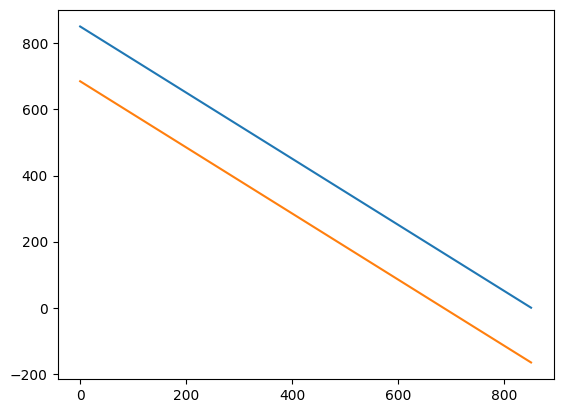

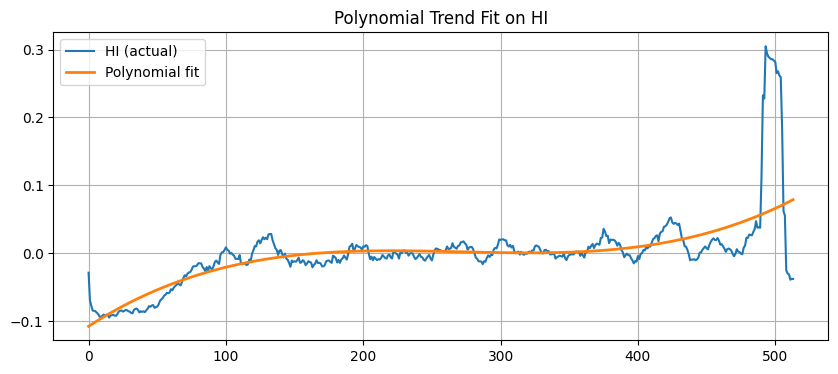

Predicted RUL (poly): [ 4.72235656e+02  4.71235656e+02  4.70235656e+02  4.69235656e+02
  4.68235656e+02  4.67235656e+02  4.66235656e+02  4.65235656e+02
  4.64235656e+02  4.63235656e+02  4.62235656e+02  4.61235656e+02
  4.60235656e+02  4.59235656e+02  4.58235656e+02  4.57235656e+02
  4.56235656e+02  4.55235656e+02  4.54235656e+02  4.53235656e+02
  4.52235656e+02  4.51235656e+02  4.50235656e+02  4.49235656e+02
  4.48235656e+02  4.47235656e+02  4.46235656e+02  4.45235656e+02
  4.44235656e+02  4.43235656e+02  4.42235656e+02  4.41235656e+02
  4.40235656e+02  4.39235656e+02  4.38235656e+02  4.37235656e+02
  4.36235656e+02  4.35235656e+02  4.34235656e+02  4.33235656e+02
  4.32235656e+02  4.31235656e+02  4.30235656e+02  4.29235656e+02
  4.28235656e+02  4.27235656e+02  4.26235656e+02  4.25235656e+02
  4.24235656e+02  4.23235656e+02  4.22235656e+02  4.21235656e+02
  4.20235656e+02  4.19235656e+02  4.18235656e+02  4.17235656e+02
  4.16235656e+02  4.15235656e+02  4.14235656e+02  4.13235656e+02
  4

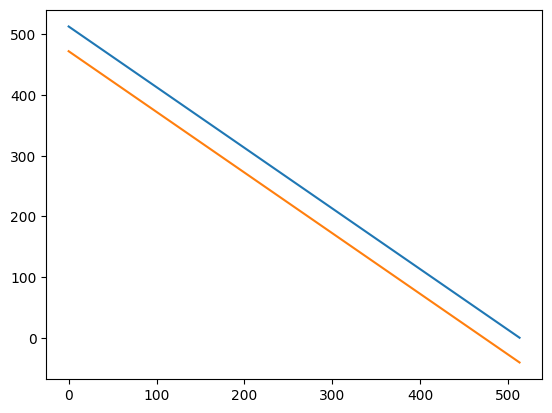

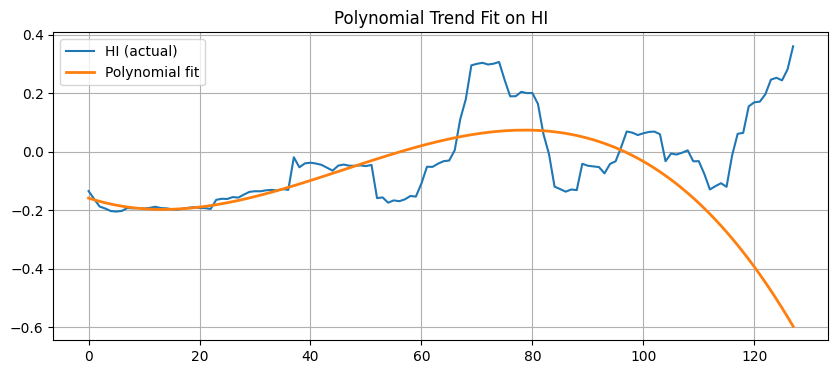

Predicted RUL (poly): [ 83.37056328  82.37056328  81.37056328  80.37056328  79.37056328
  78.37056328  77.37056328  76.37056328  75.37056328  74.37056328
  73.37056328  72.37056328  71.37056328  70.37056328  69.37056328
  68.37056328  67.37056328  66.37056328  65.37056328  64.37056328
  63.37056328  62.37056328  61.37056328  60.37056328  59.37056328
  58.37056328  57.37056328  56.37056328  55.37056328  54.37056328
  53.37056328  52.37056328  51.37056328  50.37056328  49.37056328
  48.37056328  47.37056328  46.37056328  45.37056328  44.37056328
  43.37056328  42.37056328  41.37056328  40.37056328  39.37056328
  38.37056328  37.37056328  36.37056328  35.37056328  34.37056328
  33.37056328  32.37056328  31.37056328  30.37056328  29.37056328
  28.37056328  27.37056328  26.37056328  25.37056328  24.37056328
  23.37056328  22.37056328  21.37056328  20.37056328  19.37056328
  18.37056328  17.37056328  16.37056328  15.37056328  14.37056328
  13.37056328  12.37056328  11.37056328  10.37056328  

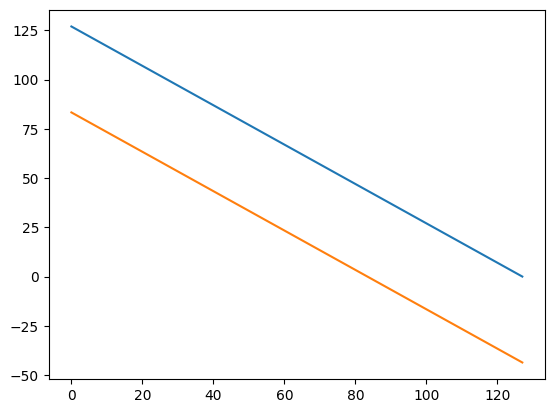

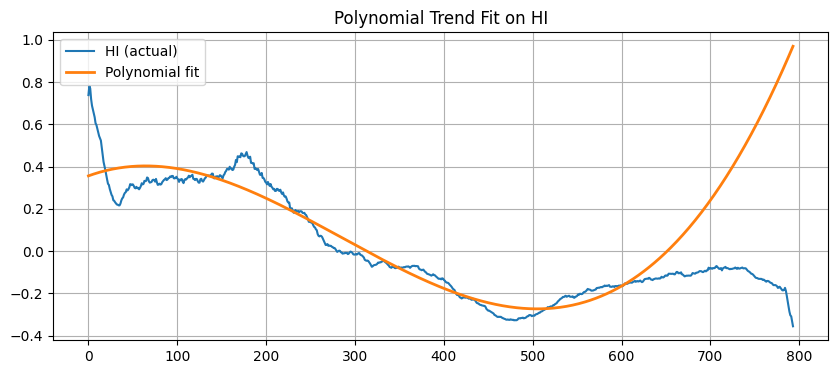

Predicted RUL (poly): [ 7.25770325e+02  7.24770325e+02  7.23770325e+02  7.22770325e+02
  7.21770325e+02  7.20770325e+02  7.19770325e+02  7.18770325e+02
  7.17770325e+02  7.16770325e+02  7.15770325e+02  7.14770325e+02
  7.13770325e+02  7.12770325e+02  7.11770325e+02  7.10770325e+02
  7.09770325e+02  7.08770325e+02  7.07770325e+02  7.06770325e+02
  7.05770325e+02  7.04770325e+02  7.03770325e+02  7.02770325e+02
  7.01770325e+02  7.00770325e+02  6.99770325e+02  6.98770325e+02
  6.97770325e+02  6.96770325e+02  6.95770325e+02  6.94770325e+02
  6.93770325e+02  6.92770325e+02  6.91770325e+02  6.90770325e+02
  6.89770325e+02  6.88770325e+02  6.87770325e+02  6.86770325e+02
  6.85770325e+02  6.84770325e+02  6.83770325e+02  6.82770325e+02
  6.81770325e+02  6.80770325e+02  6.79770325e+02  6.78770325e+02
  6.77770325e+02  6.76770325e+02  6.75770325e+02  6.74770325e+02
  6.73770325e+02  6.72770325e+02  6.71770325e+02  6.70770325e+02
  6.69770325e+02  6.68770325e+02  6.67770325e+02  6.66770325e+02
  6

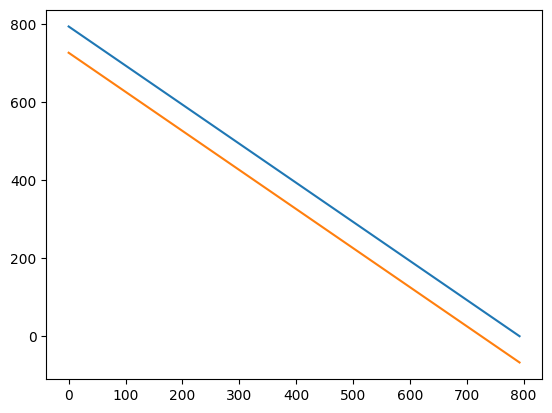

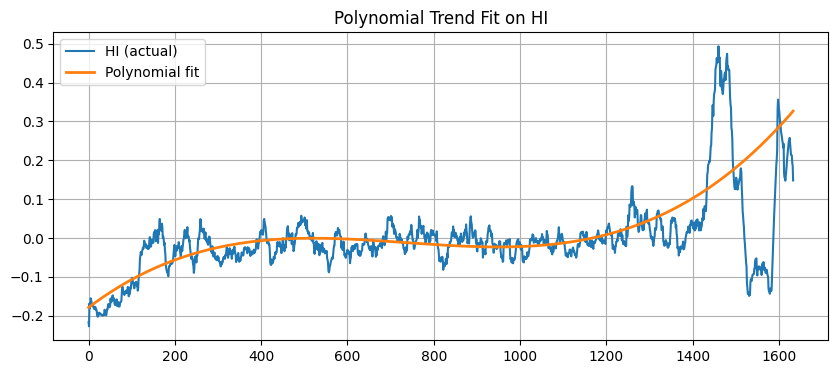

Predicted RUL (poly): [1520.61487844 1519.61487844 1518.61487844 ... -110.38512156 -111.38512156
 -112.38512156]
################################################################################
Actual RUL (poly): 0       1633.004379
1       1632.004379
2       1631.004379
3       1630.004379
4       1629.004379
           ...     
1629       4.004379
1630       3.004379
1631       2.004379
1632       1.004379
1633       0.004379
Name: rul_value, Length: 1634, dtype: float64


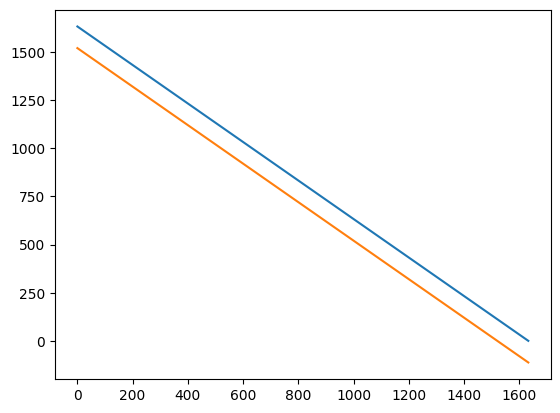

In [152]:
paths = ['../data/train/Bearing1_1_normalized_features.csv', '../data/train/Bearing2_1_normalized_features.csv', '../data/train/Bearing3_1_normalized_features.csv',
         '../data/train/Bearing1_2_normalized_features.csv', '../data/train/Bearing2_2_normalized_features.csv', '../data/train/Bearing3_2_normalized_features.csv']

failing_threshold = 0
RUL_pred_sec = []
RUL_actual_sec = []

for path in paths:
    df = pd.read_csv(path)
    failing_threshold = df["hi_smooth"].quantile(0.95)
    RUL_actual_sec = df["rul_value"]
    RUL_actual_sec = RUL_actual_sec/10
    t = np.arange(len(df))
    
    HI = df["hi_smooth"].values

    # only using 80% to avoid data leakage
    cut = int(0.8 * len(df))

    # fitting a cubic model
    a,b,c,d = np.polyfit(t[:cut], HI[:cut], 3)

    HI_poly = a*t**3 + b*t**2 + c*t + d

    plt.figure(figsize=(10,4))
    plt.plot(t, HI, label="HI (actual)")
    plt.plot(t, HI_poly, label="Polynomial fit", linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.title("Polynomial Trend Fit on HI")
    plt.show()

    roots = np.roots([a, b, c, d - failing_threshold])
    t_fail = np.max(roots.real)

    RUL_pred_sec = (t_fail - t)
    print("Predicted RUL (poly):", RUL_pred_sec)
    print("#"*80)
    print("Actual RUL (poly):", RUL_actual_sec)

    plt.plot(RUL_actual_sec)
    plt.plot(RUL_pred_sec)


